# Upload Dataset

In [48]:
from google.colab import files 
uploaded = files.upload() # uploaded to the content folder 

Saving DailyVisualizationDataWithScale.csv to DailyVisualizationDataWithScale.csv


In [49]:
# Upload CSV file from local drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors


In [50]:
df_dataset = pd.read_csv('./DailyVisualizationDataWithScale.csv')
print(df_dataset)

            date  ... symptom:pancreatitis
0     2020-03-09  ...             5.196877
1     2020-03-16  ...             6.077704
2     2020-03-23  ...             0.000000
3     2020-03-30  ...             0.000000
4     2020-04-06  ...             0.000000
...          ...  ...                  ...
1474  2020-08-24  ...             0.000000
1475  2020-08-31  ...            78.848662
1476  2020-09-07  ...            64.745649
1477  2020-09-14  ...            35.257532
1478  2020-09-21  ...             0.000000

[1479 rows x 424 columns]


# **Task 2.1** 
Visualize the evolution of popularity of various symptoms across different regions over time

## 2D Grid Plot

In [51]:
features = df_dataset.iloc[:,2:].values
i,j = features.shape

# 3 Most Popular symptomps in the dataset 
features_sum = np.sum(features, axis=0)
features_order = np.argsort(features_sum)
main_symptom_indices = features_order[-3:] # Get the max sum 
main_symptom_indices = main_symptom_indices+2 # indix with respect to df_dataset
main_symptoms = list(df_dataset.columns[main_symptom_indices])

# 3 popular symptomps in covid-19
covid_symptoms = ['symptom:Cough', 'symptom:Fever', 'symptom:Shortness of breath']
covid_symptom_indices = list([df_dataset.columns.get_loc(i) for i in covid_symptoms])
main_symptom_indices = np.append(main_symptom_indices, covid_symptom_indices)
main_symptoms += covid_symptoms

print(main_symptoms)

['symptom:Allergy', 'symptom:Infection', 'symptom:Pain', 'symptom:Cough', 'symptom:Fever', 'symptom:Shortness of breath']


In [52]:
#### 2D Grid Visualization 
dataset_array = df_dataset.values
column_names = df_dataset.columns

# Extract all states
states = np.unique(df_dataset.iloc[:,1])

# Initialize a dict to store state (key) and the row ranges in the matrix (value)
state_range_dict = {state: [] for state in states} 
for state in states:
  state_range_dict[state] = [np.where(dataset_array == state)[0][0], np.where(dataset_array == state)[0][-1]]

# Create a dict to store rows for each region 
state_dict = {state: [] for state in states} 
for key in state_dict:
  new_matrix = features[state_range_dict[key][0] : state_range_dict[key][1]+1]
  state_dict[key] = new_matrix


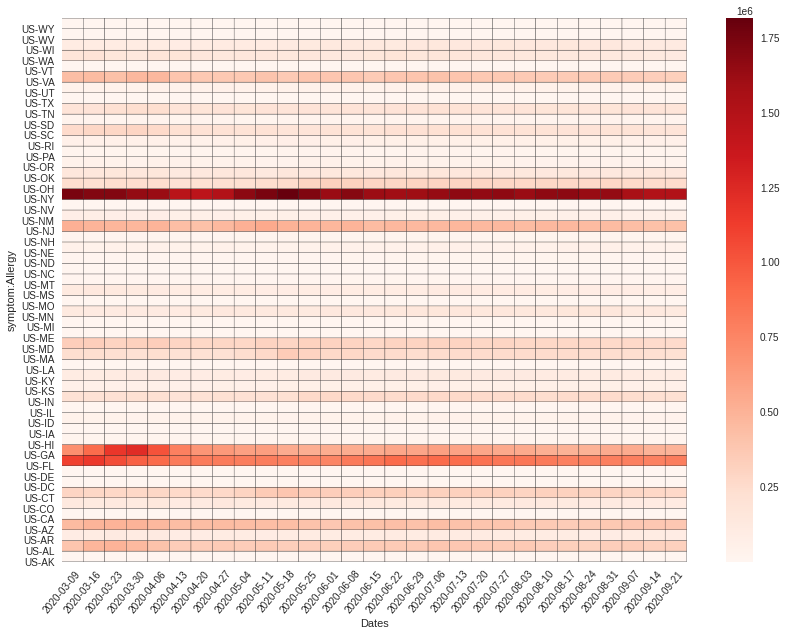

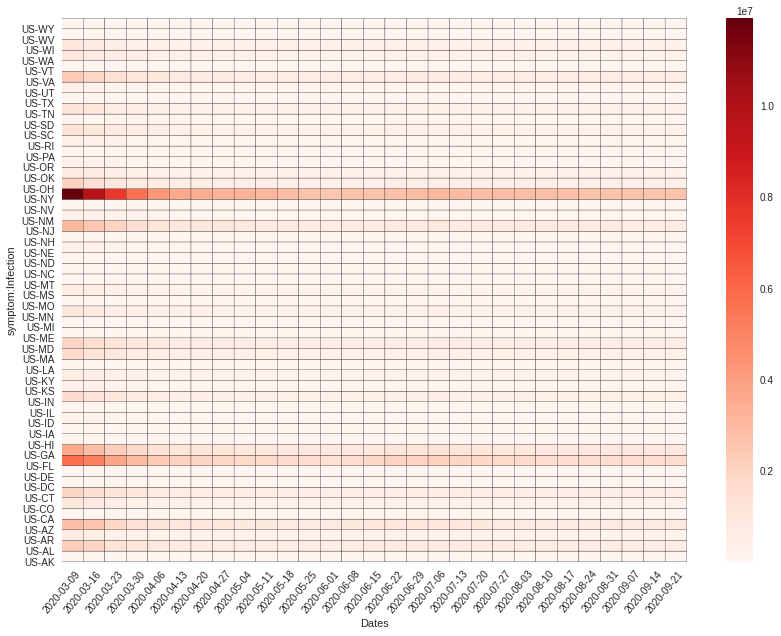

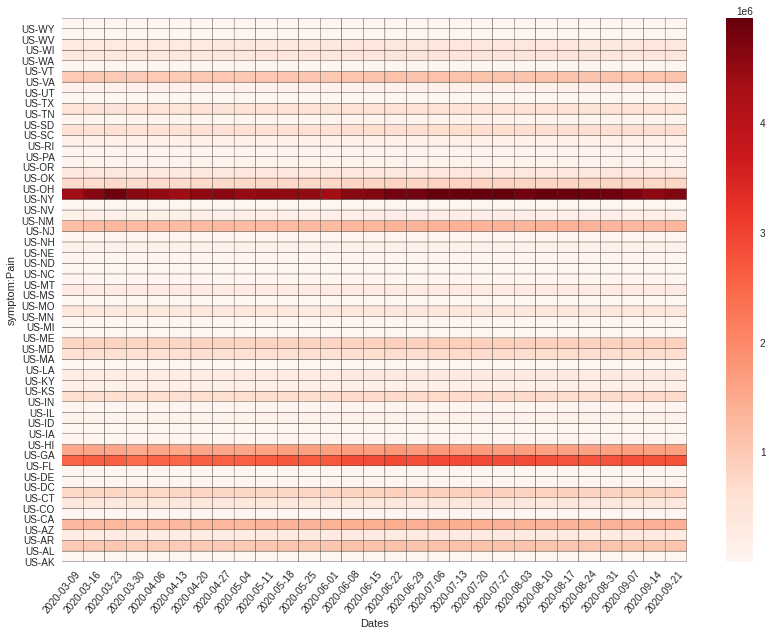

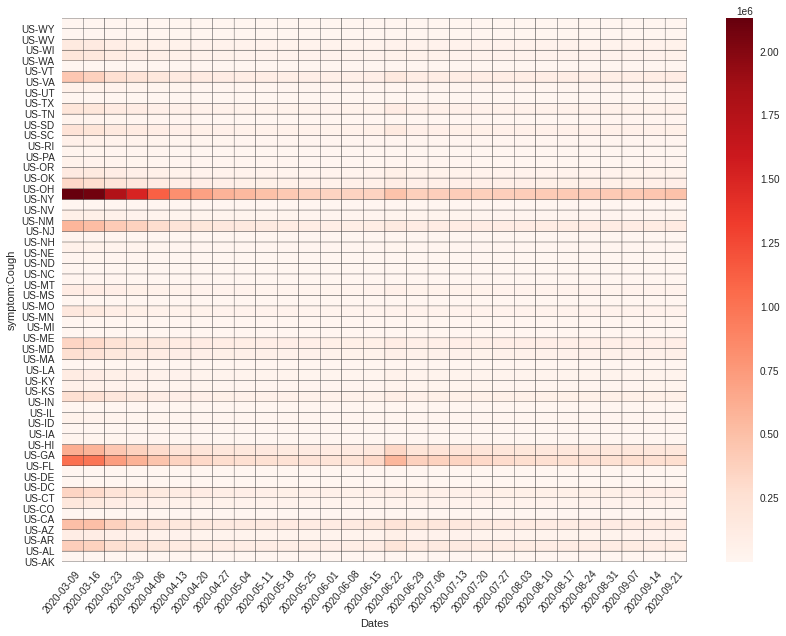

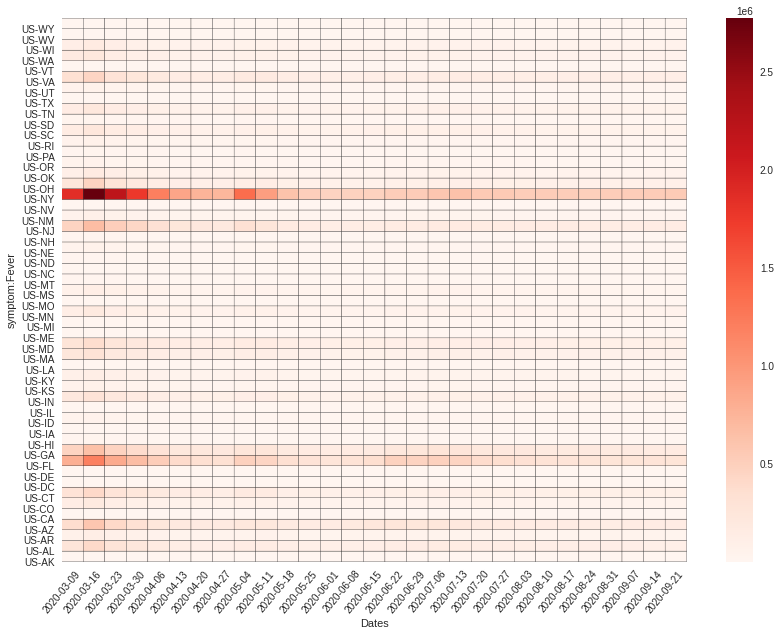

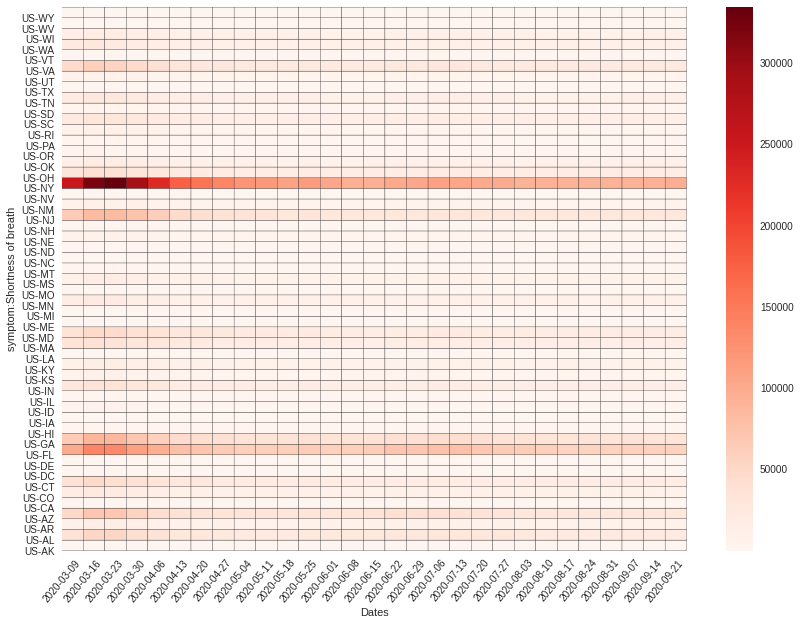

In [53]:
for index in main_symptom_indices:

  # X axis is the dates
  dates = df_dataset['date'].unique()

  num_states = len(state_dict.keys())
  num_dates = len(dates)
  frequency_list = []
  frequency_matrix = np.zeros((num_states, num_dates), dtype=float)
  loc = 0
  for key in state_dict: 
    frequency_matrix[loc] = state_dict[key][:,index-2].T
    loc += 1
  
  fig = plt.figure(figsize=(14,10))
  plt.pcolor(frequency_matrix,cmap='Reds',edgecolors='k')

  plt.xlabel('Dates')
  plt.ylabel(df_dataset.columns[index])  

  xtickvalues = range(0,num_dates)
  ytickvalues = range(0, num_states)
  plt.xticks(ticks=xtickvalues, labels=dates, rotation=50)
  plt.yticks(ticks=ytickvalues, labels=state_dict.keys())

  plt.colorbar()
  fig.savefig('grid_{}.png'.format(df_dataset.columns[index]), bbox_inches='tight')
  plt.show()


## Line Plot

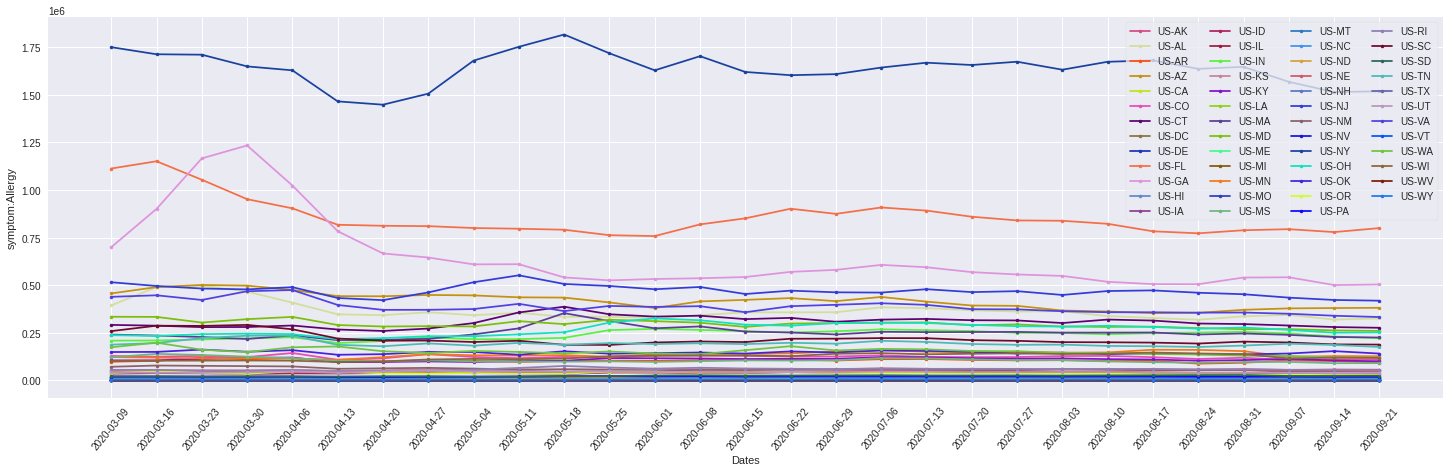

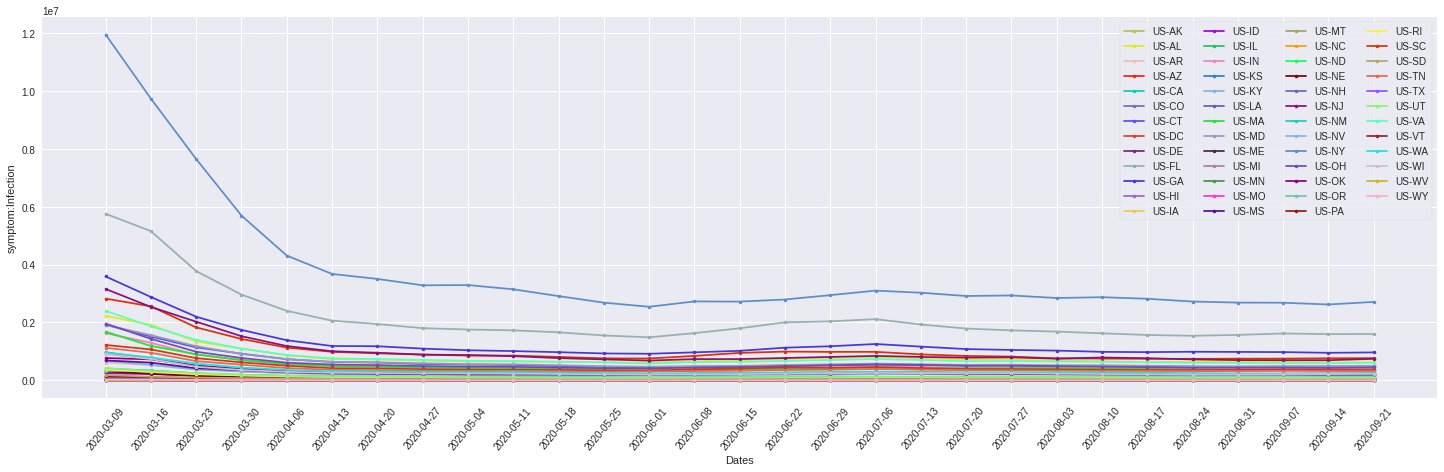

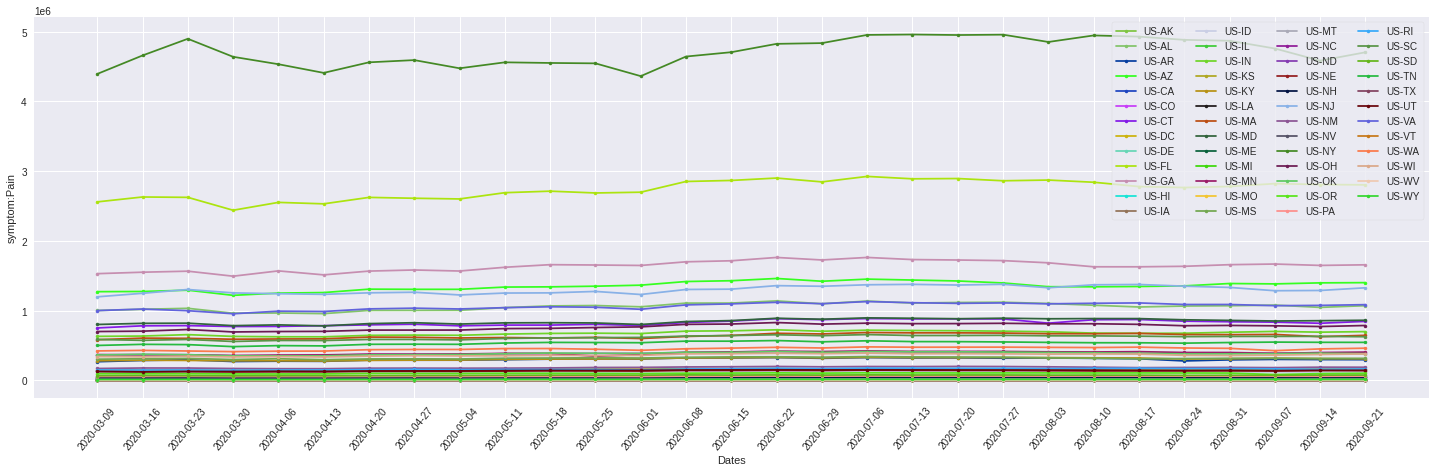

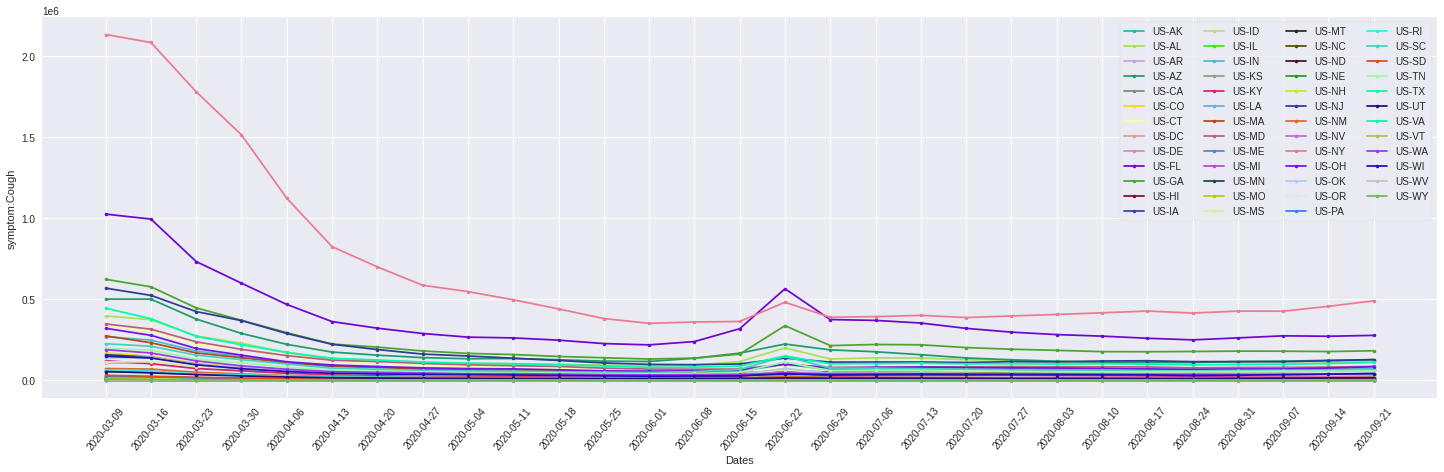

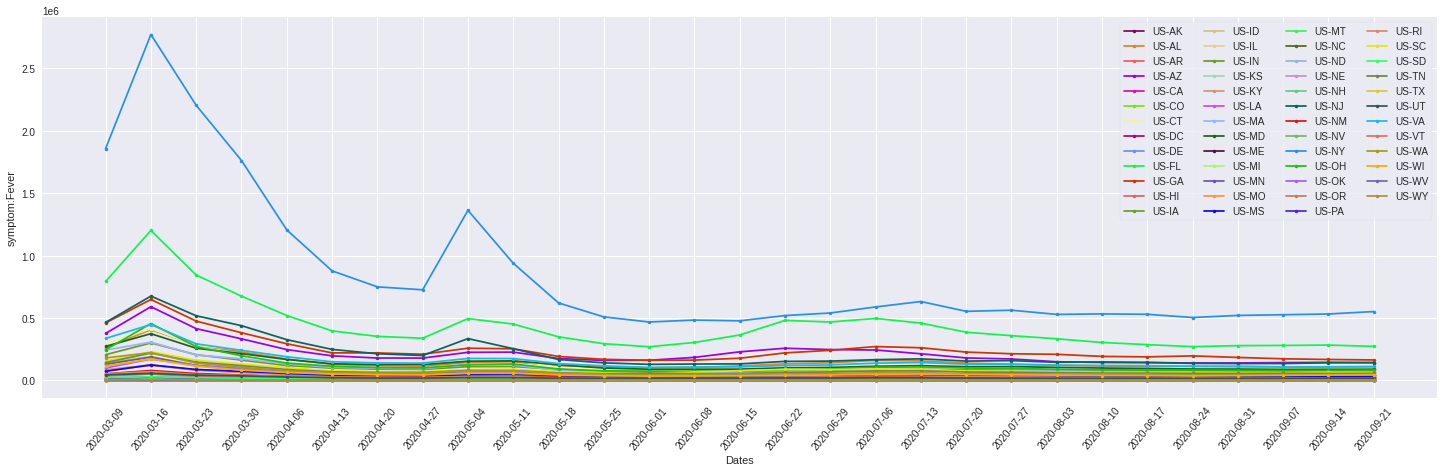

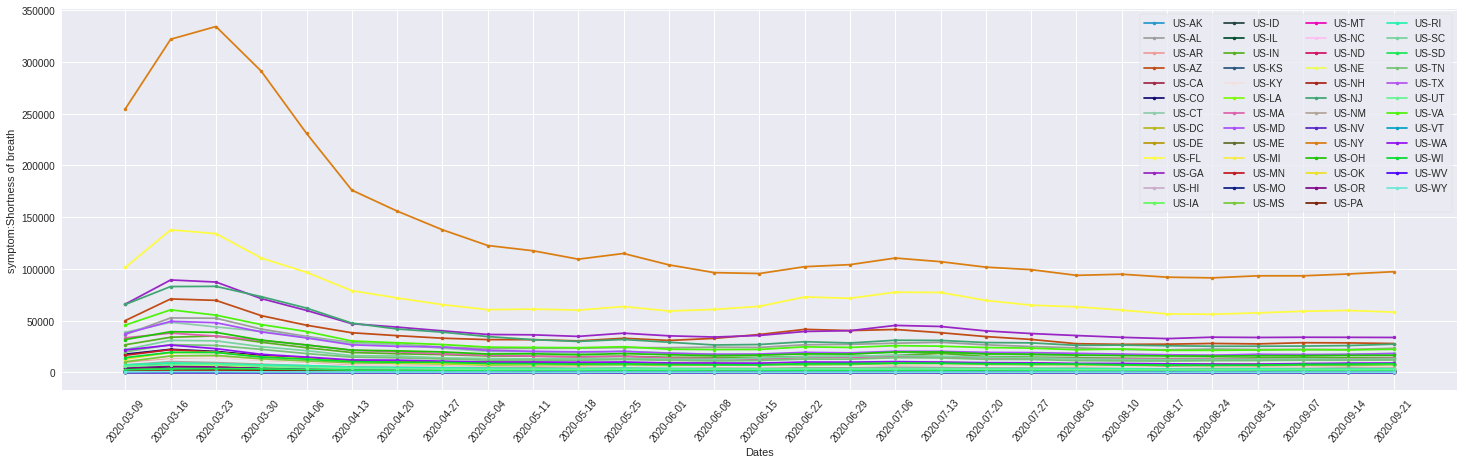

In [54]:
for index in main_symptom_indices:

  fig, ax = plt.subplots(figsize=(25,7))

  # X axis is the dates
  dates = df_dataset['date'].unique()
  lines = []
  for key in state_dict: 

    frequencies = state_dict[key][:,index-2]

    lines += ax.plot(dates, frequencies, color=np.random.rand(3),marker='.')

  ax.legend(lines, list(state_dict.keys()),
            loc='upper right', frameon=True, ncol=4)

  ax.set_xlabel('Dates')
  ax.set_ylabel(df_dataset.columns[index])  

  plt.xticks(rotation=50)
  fig.savefig('line_{}.png'.format(df_dataset.columns[index]), bbox_inches='tight')

  plt.show()

# Visualize dataset in Lower Dimension (PCA)

In [55]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans


In [56]:
df_dataset = pd.read_csv('./DailyVisualizationDataWithScale.csv')
df_withStates = df_dataset
# Remove the 'date' column
df_dataset = df_dataset.drop(['open_covid_region_code', 'date'], axis=1)

In [57]:
dataset_matrix = df_dataset.values
column_names = df_dataset.columns

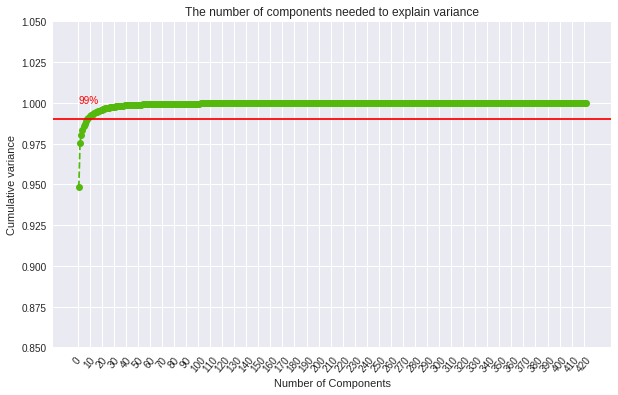

Number of Components should be  9


In [58]:
# Find the best number of components 
norm_dataset_matrix = StandardScaler().fit_transform(dataset_matrix)

pca = PCA().fit(norm_dataset_matrix)
fig = plt.figure(figsize=(10, 6))

i,j = norm_dataset_matrix.shape
x = np.arange(1, j+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.85,1.05)
plt.plot(x, y, marker='o', linestyle='--', color=np.random.rand(3))

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, j+1, step=10),rotation=50) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')
plt.axhline(y = 0.99, color='r', linestyle='-')
plt.text(0.5, 1, '99%', color = 'red')

ax.grid(axis='x')
plt.show()

X_reduced = PCA(n_components = 0.99).fit_transform(norm_dataset_matrix)
_, n_comp = X_reduced.shape
print('Number of Components should be ', n_comp)
fig.savefig('PCA_CUM_VAR.png',bbox_inches='tight')


In [59]:
# PCA Plot based on Regions 
# Loading the data from sklearn
norm_dataset_matrix = StandardScaler().fit_transform(dataset_matrix)

X_reduced = PCA(n_components=n_comp).fit_transform(norm_dataset_matrix)
print(X_reduced.shape)


# Indicate different regions with different colors to see if there's any relation
fig = px.scatter(X_reduced[:,:2], x=0, y=1, color=df_withStates['open_covid_region_code'])
fig.update_layout(
    title = 'PCA Plot Based on Region',
    xaxis_title ='PC1',
    yaxis_title ='PC2',
)
fig.show()


(1479, 9)


In [60]:
# PCA Plot based on date 
# Loading the data from sklearn
norm_dataset_matrix = StandardScaler().fit_transform(dataset_matrix)

X_reduced = PCA(n_components=n_comp).fit_transform(norm_dataset_matrix)

# Indicate different regions with different colors to see if there's any relation
fig = px.scatter(X_reduced[:,:2], x=0, y=1, color=df_withStates['date'])
fig.update_layout(
    title = 'PCA Plot Based On Date',
    xaxis_title ='PC1',
    yaxis_title ='PC2',
)
fig.show()


# K-Means Clustering

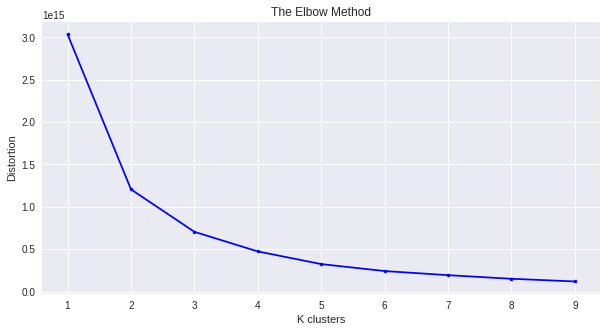

In [61]:
# Use Elbow method to find the best k
features_array = dataset_array[:, 2:-1]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(features_array)
    distortions.append(kmeanModel.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-', marker='.')
plt.xlabel('K clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()
fig.savefig('Kmeans_Elbow.png', bbox_inches='tight')


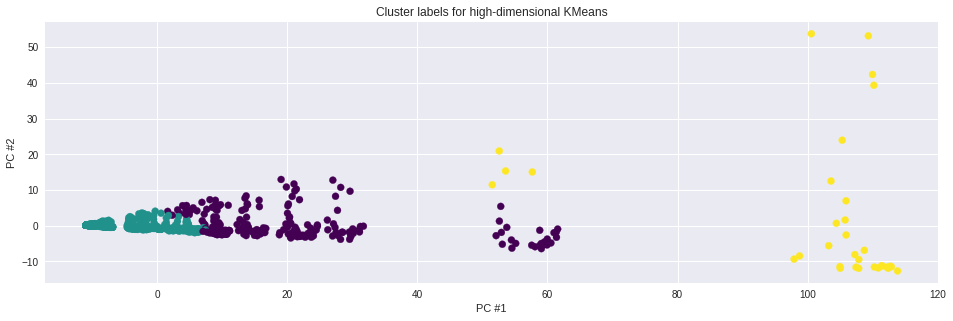

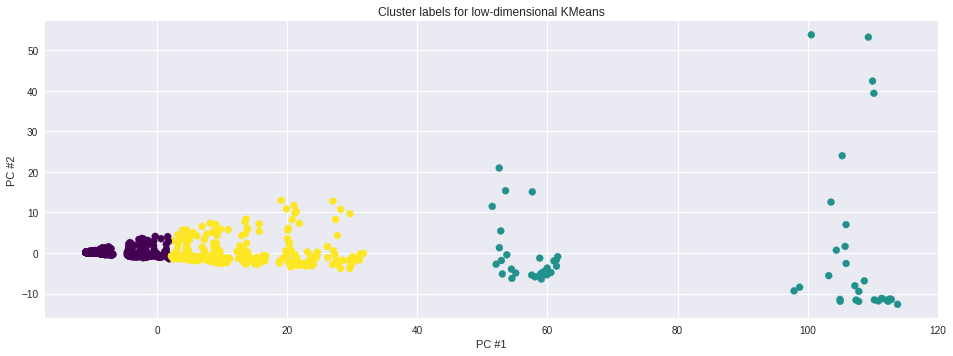

In [62]:
# Perform Clustering 
k = 3

kmeans_high = KMeans(n_clusters=k, random_state=0)
kmeans_high.fit(features_array)
y_pred_high = kmeans_high.predict(features_array)

kmeans_low = KMeans(n_clusters=k, random_state=0)
kmeans_low.fit(X_reduced)
y_pred_low = kmeans_low.predict(X_reduced)

# High Dimensional Kmeans 
fig = plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(2,1,1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_high, cmap=plt.cm.get_cmap('viridis',k))
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for high-dimensional KMeans")
fig.savefig('kmeans_high.png', bbox_inches='tight')


# Low Dimensional K-means
fig = plt.figure(figsize=(16,12))
plt.subplot(2,1,2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_low, cmap=plt.cm.get_cmap('viridis',k))
plt.clim(-0.5,2.5)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Cluster labels for low-dimensional KMeans")
fig.savefig('kmeans_low.png', bbox_inches='tight')

